<h1 style="text-align:center;">DESAFIO 2</h1>
<h2 style="text-align:center;">Ciência e Governança de Dados</h2>
<h3 style="text-align:center;">Modelo Preditivo - Machine Learning</h3>

In [1]:
# importa as bibliotecas padrão e de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importa as ferramentas do scikit-Learn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importa os modelos que serão utilizados
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# importa as métricas
from sklearn.metrics import mean_squared_error, r2_score

# configurações visuais 
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# importa o dataSet final do Desafio 1
dataset_analise = pd.read_csv('dados/dataset_limpo.csv', sep = ',')

In [3]:
# mostra as informações do dataSet
dataset_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         5118 non-null   int64  
 1   cod_municipio_6dig          5118 non-null   int64  
 2   total_crimes                5118 non-null   int64  
 3   matriculas_basica_total     5118 non-null   float64
 4   matriculas_fundamental      5118 non-null   float64
 5   matriculas_medio            5118 non-null   float64
 6   matriculas_eja              5118 non-null   float64
 7   ingressantes_total          5118 non-null   float64
 8   matriculas_superior_total   5118 non-null   float64
 9   concluintes_total           5118 non-null   float64
 10  populacao                   5118 non-null   float64
 11  IDHM_REF                    5118 non-null   float64
 12  taxa_crime_100k             5118 non-null   float64
 13  taxa_mat_basica_100k        5118 

**Analise 1**  
  
  Criminalidade -> Total Crimes

In [4]:
# cria a coluna de educação e economia que será parte do X
colunas_educacao = ['matriculas_basica_total', 'matriculas_superior_total', 'ingressantes_total', 'concluintes_total'] 
colunas_economia = ['PIB', 'IDHM_REF']

# cria o X e o Y para utilizar os modelos
X_total_crimes = dataset_analise[colunas_economia + colunas_educacao + ['populacao']]
y_total_crimes = dataset_analise['total_crimes']

# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
X_treino_total_crimes, X_teste_total_crimes, y_treino_total_crimes, y_teste_total_crimes = train_test_split(X_total_crimes, y_total_crimes, test_size=0.2, random_state=42)



Relatório: Regressão Linear
R² (Explicação): 0.75 (ou 74.9%)
MSE (Erro Quadrático): 122094.42
RMSE (Erro Médio Real): 349.42


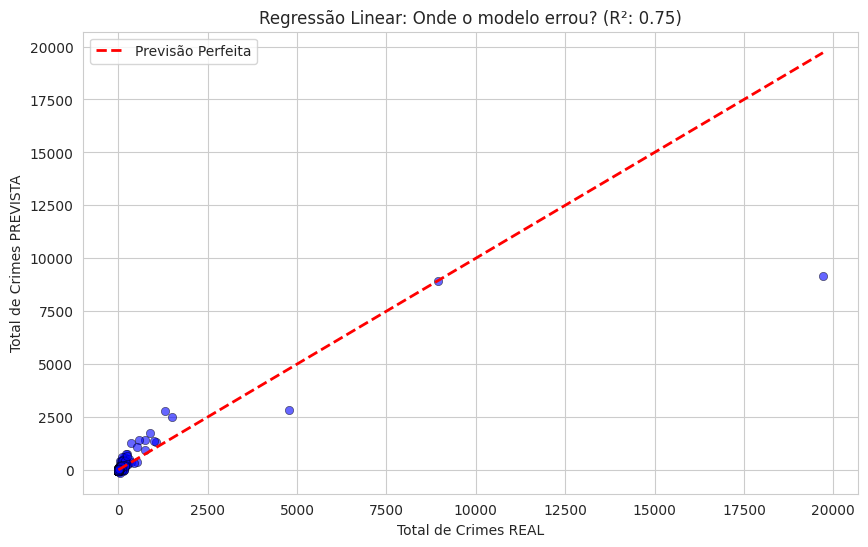

In [5]:
# criação do modelo base de Regressão Linear

# faz o treino do modelo
lin_reg_total_crimes = LinearRegression()
lin_reg_total_crimes.fit(X_treino_total_crimes, y_treino_total_crimes)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_total_crimes = lin_reg_total_crimes.predict(X_teste_total_crimes)

# utiliza as métricas de avaliação
r2_lin_total_crimes = r2_score(y_teste_total_crimes, y_pred_lin_total_crimes)
mse_lin_total_crimes = mean_squared_error(y_teste_total_crimes, y_pred_lin_total_crimes)
rmse_lin_total_crimes = np.sqrt(mse_lin_total_crimes)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_total_crimes:.2f} (ou {r2_lin_total_crimes*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_total_crimes:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_total_crimes:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_total_crimes, y=y_pred_lin_total_crimes, alpha=0.6, color='blue', edgecolor='k')
linha_ideal_total_crimes = np.linspace(y_teste_total_crimes.min(), y_teste_total_crimes.max(), 100)
plt.plot(linha_ideal_total_crimes, linha_ideal_total_crimes, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Total de Crimes REAL")
plt.ylabel("Total de Crimes PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_total_crimes:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest (Base)
R² (Explicação): 0.85 (ou 84.7%)
MSE (Erro Quadrático): 74596.72
RMSE (Erro Médio Real): 273.12


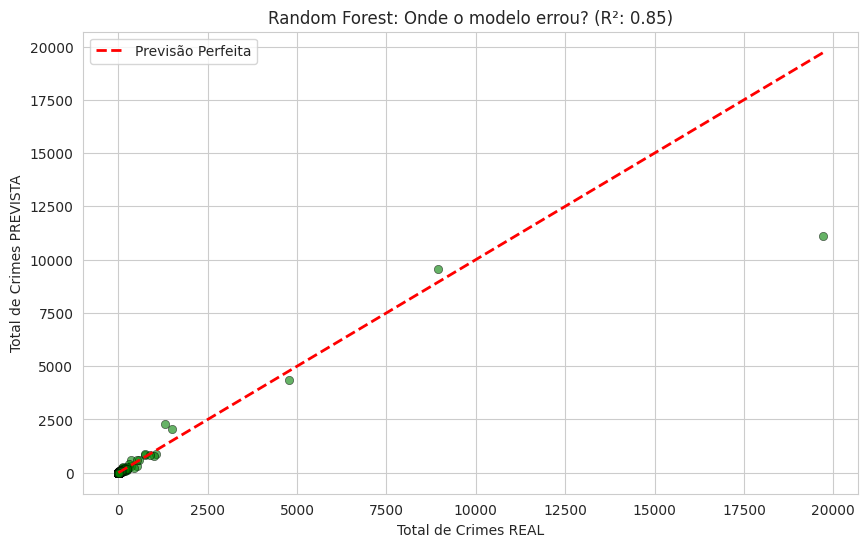

In [6]:
# criação do Randon Forest Regressor para comparação

# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_base_total_crimes = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base_total_crimes.fit(X_treino_total_crimes, y_treino_total_crimes)

# faz a previsão
y_pred_rf_total_crimes = rf_base_total_crimes.predict(X_teste_total_crimes)

# utiliza as métricas de avaliação
r2_rf_total_crimes = r2_score(y_teste_total_crimes, y_pred_rf_total_crimes)
mse_rf_total_crimes = mean_squared_error(y_teste_total_crimes, y_pred_rf_total_crimes)
rmse_rf_total_crimes = np.sqrt(mse_rf_total_crimes)

# mostra o relatório de desempenho
print(f"\nRelatório: Random Forest (Base)")
print(f"R² (Explicação): {r2_rf_total_crimes:.2f} (ou {r2_rf_total_crimes*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_total_crimes:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_total_crimes:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_total_crimes, y=y_pred_rf_total_crimes, alpha=0.6, color='green', edgecolor='k')
linha_ideal_total_crimes = np.linspace(y_teste_total_crimes.min(), y_teste_total_crimes.max(), 100)
plt.plot(linha_ideal_total_crimes, linha_ideal_total_crimes, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')

plt.xlabel("Total de Crimes REAL")
plt.ylabel("Total de Crimes PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_total_crimes:.2f})")
plt.legend()
plt.show()

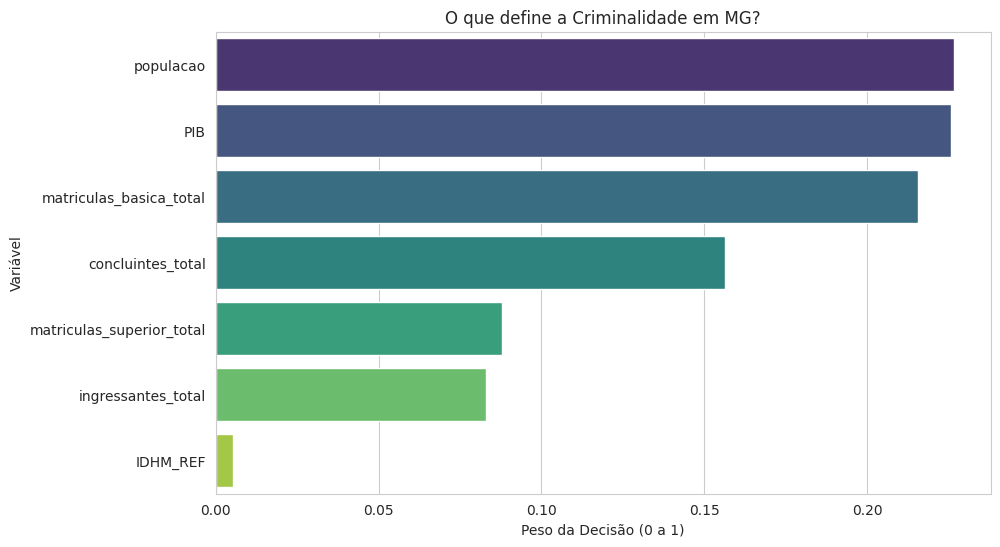

In [7]:
# gráfico para visulização da importância de cada coluna do X
importancias_total_crimes = rf_base_total_crimes.feature_importances_
nomes_colunas_total_crimes = X_total_crimes.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_total_crimes = pd.DataFrame({
    'Variável': nomes_colunas_total_crimes,
    'Importância': importancias_total_crimes
}).sort_values(by='Importância', ascending=False) # ordena do maior para o menor

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_total_crimes, palette = 'viridis', legend = False)
plt.title('O que define a Criminalidade em MG?')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()


Resultado da Otimização
Melhores Parâmetros Encontrados: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

Desempenho Final (Otimizado)
R² (Explicação): 0.84
MSE (Erro Quadrático): 79362.52
RMSE (Erro Médio Real): 273.12


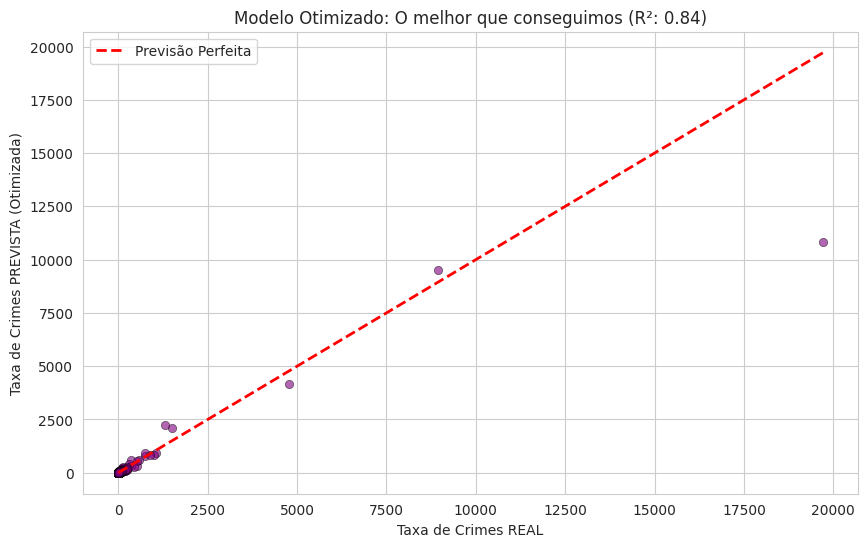

In [8]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2
from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_total_crimes = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
grid_search_total_crimes = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_total_crimes,
    cv=5,                                # validação cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',    
    n_jobs=-1                            
)

# treino
grid_search_total_crimes.fit(X_treino_total_crimes, y_treino_total_crimes)

# mostra o resultados da otimização
melhor_modelo_total_crimes = grid_search_total_crimes.best_estimator_
print(f"\nResultado da Otimização")
print(f"Melhores Parâmetros Encontrados: {grid_search_total_crimes.best_params_}")

# usa as métricas para avaliar o melhor modelo
y_pred_otimizado_total_crimes = melhor_modelo_total_crimes.predict(X_teste_total_crimes)
r2_opt_total_crimes = r2_score(y_teste_total_crimes, y_pred_otimizado_total_crimes)
mse_opt_total_crimes = mean_squared_error(y_teste_total_crimes, y_pred_otimizado_total_crimes)
rmse_opt_total_crimes = np.sqrt(mse_opt_total_crimes)
print(f"\nDesempenho Final (Otimizado)")
print(f"R² (Explicação): {r2_opt_total_crimes:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_total_crimes:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_total_crimes:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_total_crimes, y=y_pred_otimizado_total_crimes, alpha=0.6, color='purple', edgecolor='k')
linha_ideal = np.linspace(y_teste_total_crimes.min(), y_teste_total_crimes.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor que conseguimos (R²: {r2_opt_total_crimes:.2f})")
plt.legend()
plt.show()

**Conclusão total de crimes por cidade**
  
Os parâmetros usados como X para fazer a previsão do total de crimes foi satisfatório, conseguindo atingir 85% de acerto no Randon Forest.
  
  É possivel concluir também que o total de crimes é relativamente linear, isso se dá ao fato de que a regressão lienar também atingiu um resultado satisfatório de 75% de acerto.
  
  Além disso, a população e o PIB são os fatores mais importantes para a causa das criminalidade em Minas Gerais, seguido da educação básica.

**Analise 2**  
  
  Criminalidade -> Taxa de Crime - 100k habitantes


Relatório: Regressão Linear
R² (Explicação): 0.25 (ou 25.4%)
MSE (Erro Quadrático): 4346.07
RMSE (Erro Médio Real): 65.92


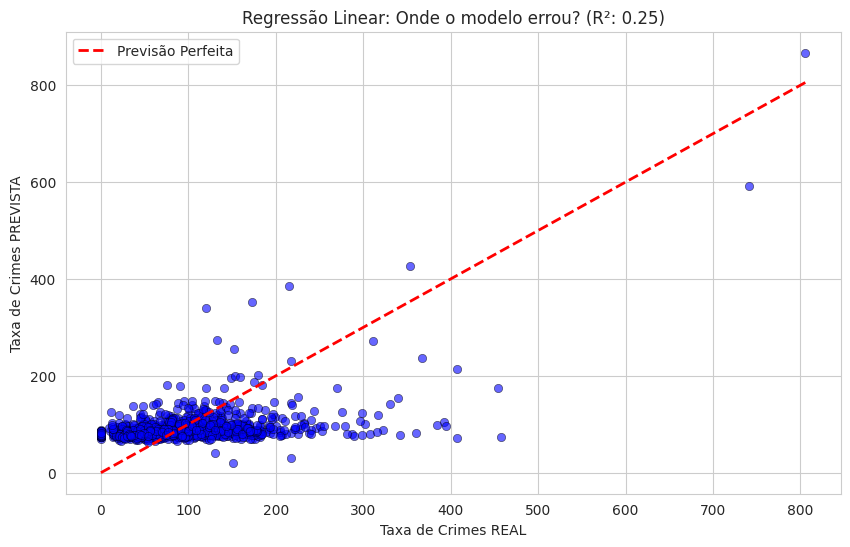

In [9]:
# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
y_taxa_crime = dataset_analise['taxa_crime_100k']
X_treino_taxa_crime, X_teste_taxa_crime, y_treino_taxa_crime, y_teste_taxa_crime = train_test_split(X_total_crimes, y_taxa_crime, test_size=0.2, random_state=42)

# criação do modelo base de Regressão Linear

# faz o treino do modelo
lin_reg_taxa_crime = LinearRegression()
lin_reg_taxa_crime.fit(X_treino_taxa_crime, y_treino_taxa_crime)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_taxa_crime = lin_reg_taxa_crime.predict(X_teste_taxa_crime)

# utiliza as métricas de avaliação
r2_lin_taxa_crime = r2_score(y_teste_taxa_crime, y_pred_lin_taxa_crime)
mse_lin_taxa_crime = mean_squared_error(y_teste_taxa_crime, y_pred_lin_taxa_crime)
rmse_lin_taxa_crime = np.sqrt(mse_lin_taxa_crime)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_taxa_crime:.2f} (ou {r2_lin_taxa_crime*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_taxa_crime:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_taxa_crime:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_taxa_crime, y=y_pred_lin_taxa_crime, alpha=0.6, color='blue', edgecolor='k')
linha_ideal = np.linspace(y_teste_taxa_crime.min(), y_teste_taxa_crime.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_taxa_crime:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest
R² (Explicação): 0.55 (ou 54.7%)
MSE (Erro Quadrático): 2642.80
RMSE (Erro Médio Real): 51.41


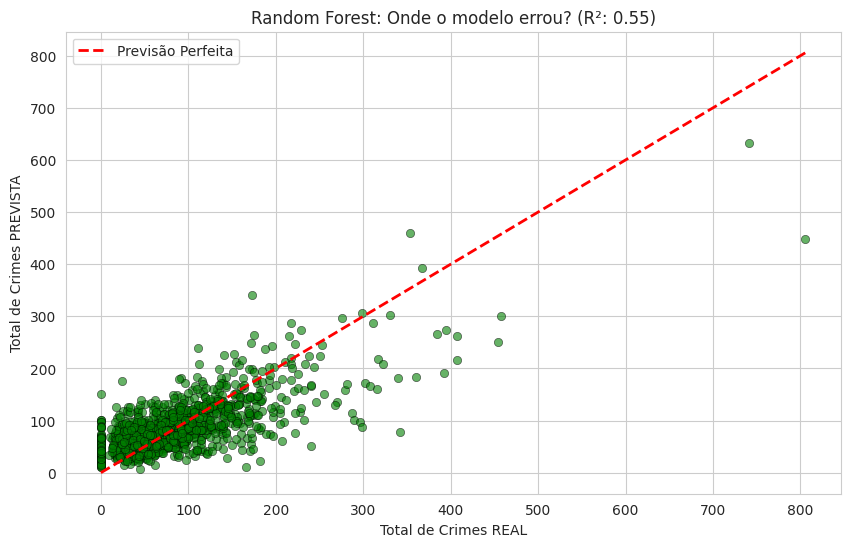

In [10]:
# criação do Randon Forest Regressor para comparação

# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_taxa_crime = RandomForestRegressor(n_estimators=100, random_state=42)
rf_taxa_crime.fit(X_treino_taxa_crime, y_treino_taxa_crime)

# faz a previsão
y_pred_rf_taxa_crime = rf_taxa_crime.predict(X_teste_taxa_crime)

# utiliza as métricas de avaliação
r2_rf_taxa_crime = r2_score(y_teste_taxa_crime, y_pred_rf_taxa_crime)
mse_rf_taxa_crime = mean_squared_error(y_teste_taxa_crime, y_pred_rf_taxa_crime)
rmse_rf_taxa_crime = np.sqrt(mse_rf_taxa_crime)

# mostra o relatório de desempenho
print(f"\nRelatório: Random Forest")
print(f"R² (Explicação): {r2_rf_taxa_crime:.2f} (ou {r2_rf_taxa_crime*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_taxa_crime:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_taxa_crime:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_taxa_crime, y=y_pred_rf_taxa_crime, alpha=0.6, color='green', edgecolor='k')
linha_ideal = np.linspace(y_teste_taxa_crime.min(), y_teste_taxa_crime.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')

plt.xlabel("Total de Crimes REAL")
plt.ylabel("Total de Crimes PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_taxa_crime:.2f})")
plt.legend()
plt.show()

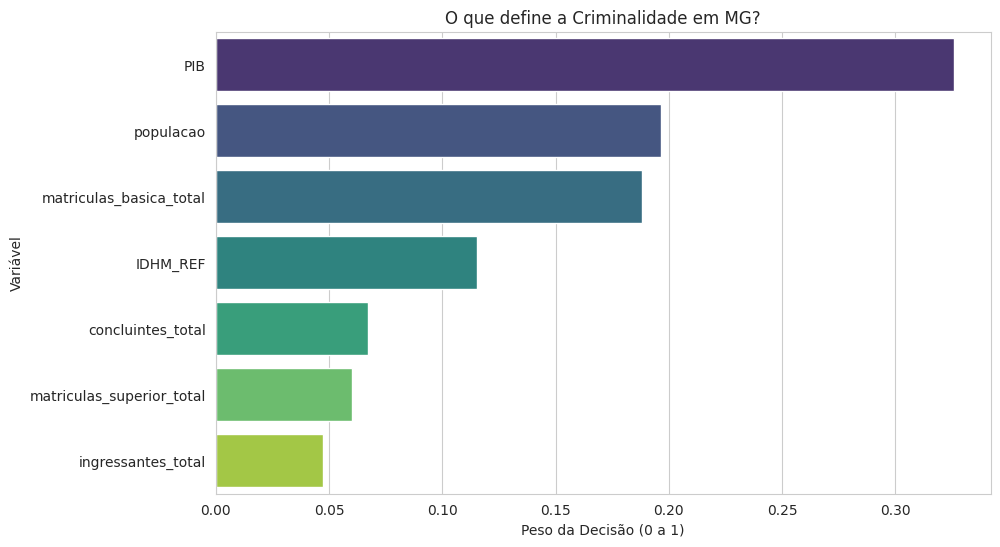

In [11]:
# gráfico para visulização da importância de cada coluna do X
importancias_taxa_crime = rf_taxa_crime.feature_importances_
nomes_colunas_taxa_crime = X_total_crimes.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_taxa_crime = pd.DataFrame({
    'Variável': nomes_colunas_taxa_crime,
    'Importância': importancias_taxa_crime
}).sort_values(by='Importância', ascending=False) # ordena do maior para o menor

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_taxa_crime, palette = 'viridis', legend = False)
plt.title('O que define a Criminalidade em MG?')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()

Iniciando otimização... (Isso pode levar alguns segundos)

Resultado da Otimização
Melhores Parâmetros Encontrados: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Desempenho Final (Otimizado)
R² (Explicação): 0.55
MSE (Erro Quadrático): 79362.52
RMSE (Erro Médio Real): 51.28


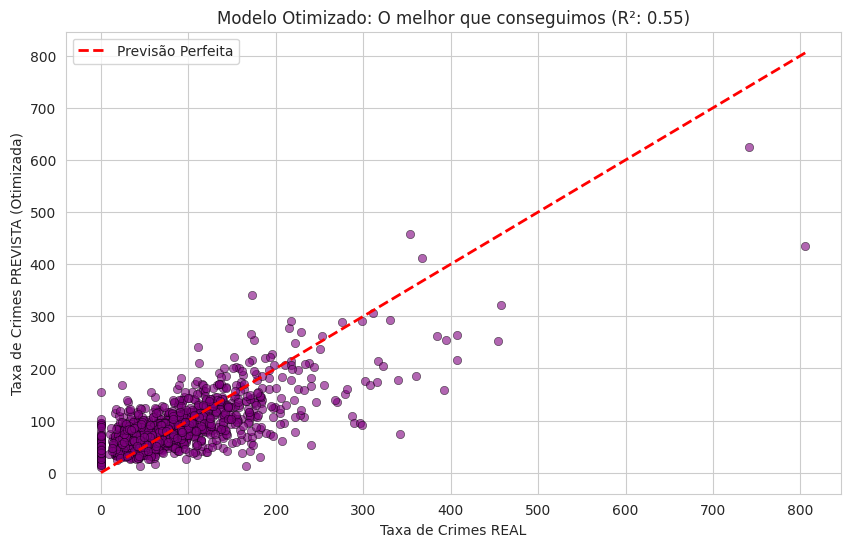

In [12]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2
from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_taxa_crime = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
print("Iniciando otimização... (Isso pode levar alguns segundos)")
grid_search_taxa_crime = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_taxa_crime,
    cv=5,                                # validação Cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',    
    n_jobs=-1                            
)

# treino
grid_search_taxa_crime.fit(X_treino_taxa_crime, y_treino_taxa_crime)

# mostra o resultados da otimização
melhor_modelo_taxa_crime = grid_search_taxa_crime.best_estimator_

print(f"\nResultado da Otimização")
print(f"Melhores Parâmetros Encontrados: {grid_search_taxa_crime.best_params_}")

# usa as métricas para avaliar o melhor modelo
y_pred_otimizado_taxa_crime = melhor_modelo_taxa_crime.predict(X_teste_taxa_crime)
r2_opt_taxa_crime = r2_score(y_teste_taxa_crime, y_pred_otimizado_taxa_crime)
mse_opt_taxa_crime = mean_squared_error(y_teste_taxa_crime, y_pred_otimizado_taxa_crime)
rmse_opt_taxa_crime = np.sqrt(mse_opt_taxa_crime)
print(f"\nDesempenho Final (Otimizado)")
print(f"R² (Explicação): {r2_opt_taxa_crime:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_total_crimes:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_opt_taxa_crime:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_taxa_crime, y=y_pred_otimizado_taxa_crime, alpha=0.6, color='purple', edgecolor='k')
linha_ideal = np.linspace(y_teste_taxa_crime.min(), y_teste_taxa_crime.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor que conseguimos (R²: {r2_opt_taxa_crime:.2f})")
plt.legend()
plt.show()

**Análise Inicial**
  Resultado nada satisfatório. Primeiramente os dados não são nada Lineares, tendo um acerto de apenas 25%, e mesmo utilizando o Randon Forest Regressor o resultado ainda fica apenas 55% de acerto.

  Ou seja devemos buscar novos dados para tentar melhorar esses parâmetros.

Adição do GINI (dado que mostra a desigualdade social) e taxa de desemprego que podem ajuda a entender melhor os fatores importantes para a taxa de criminalidade.

In [13]:
# cria uma copia temporaria para adicionar o gini e o desemprego
df_social_temp = dataset_analise.copy()

# função para limpar código IBGE (separar número do nome)
def limpar_codigo(val):
    if isinstance(val, str): return val.split(' ')[0].strip()[:6]
    return np.nan

# carrega e limpa o GINI
df_gini = pd.read_csv('dados/ginimg.csv', sep=';', decimal=',', encoding='latin1', skiprows=2)
col_mun_gini = [c for c in df_gini.columns if 'unic' in c][0]
df_gini['cod_join'] = df_gini[col_mun_gini].apply(limpar_codigo)
df_gini_clean = df_gini[['cod_join', '2010']].rename(columns={'2010': 'indice_gini'})

# carregar e limpa DESEMPREGO
df_desemp = pd.read_csv('dados/ibge_censo_cnv_desemprmg105916201_159_182_20.csv', sep=';', decimal=',', encoding='latin1', skiprows=3)
col_mun_desemp = [c for c in df_desemp.columns if 'unic' in c][0]
col_taxa_desemp = [c for c in df_desemp.columns if 'Taxa' in c][0]
df_desemp['cod_join'] = df_desemp[col_mun_desemp].apply(limpar_codigo)
df_desemp_clean = df_desemp[['cod_join', col_taxa_desemp]].rename(columns={col_taxa_desemp: 'taxa_desemprego'})

# faz o merge na cópia temporária
df_social_temp['cod_join'] = df_social_temp['cod_municipio_6dig'].astype(str).str[:6]
df_social_temp = df_social_temp.merge(df_gini_clean, on='cod_join', how='left')
df_social_temp = df_social_temp.merge(df_desemp_clean, on='cod_join', how='left')

# preenche de vazios 
df_social_temp['indice_gini'] = df_social_temp['indice_gini'].fillna(df_social_temp['indice_gini'].mean())
df_social_temp['taxa_desemprego'] = df_social_temp['taxa_desemprego'].fillna(df_social_temp['taxa_desemprego'].mean())


In [14]:
df_social_temp.isnull().sum()

ano                           0
cod_municipio_6dig            0
total_crimes                  0
matriculas_basica_total       0
matriculas_fundamental        0
matriculas_medio              0
matriculas_eja                0
ingressantes_total            0
matriculas_superior_total     0
concluintes_total             0
populacao                     0
IDHM_REF                      0
taxa_crime_100k               0
taxa_mat_basica_100k          0
taxa_mat_medio_100k           0
taxa_mat_superior_100k        0
taxa_concluintes_sup_100k     0
taxa_ingressantes_sup_100k    0
PIB                           0
cod_join                      0
indice_gini                   0
taxa_desemprego               0
dtype: int64

In [15]:
# RandonForest para testar a melhora
# definição de variáveis 
colunas_teste = [
    'populacao', 'PIB', 'IDHM_REF', 
    'matriculas_basica_total', 'matriculas_superior_total',
    'indice_gini',      
    'taxa_desemprego'    
]

X = df_social_temp[colunas_teste]
y = df_social_temp['taxa_crime_100k']

# treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# treinar modelo
rf_social_teste = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_social_teste.fit(X_treino, y_treino)

# avaliar resultado
score = rf_social_teste.score(X_teste, y_teste)
print(f"Resultado do Teste (R²): {score:.4f} ({score*100:.1f}%)")

Resultado do Teste (R²): 0.5210 (52.1%)


**Conclusão pós adição**

  Não melhorou, e até mesmo piorou. A hipótese é que como esses dados são fixos e não variam de ano para ano e a taxa de criminalidade e um dado complexo, esses dados não são suficientes para tentar explicar a taxa. Portando criarei um novo atributo que criará uma série temporal da própria taxa de criminalidade para tentar melhorar a métrica.


Resultado final: 0.8394 (83.9%)

📊 O QUE MAIS IMPACTA O CRIME?
taxa_crime_ano_anterior    0.610938
PIB                        0.089636
populacao                  0.065812
taxa_desemprego            0.065154
indice_gini                0.060271
IDHM_REF                   0.055038
matriculas_basica_total    0.053150
dtype: float64


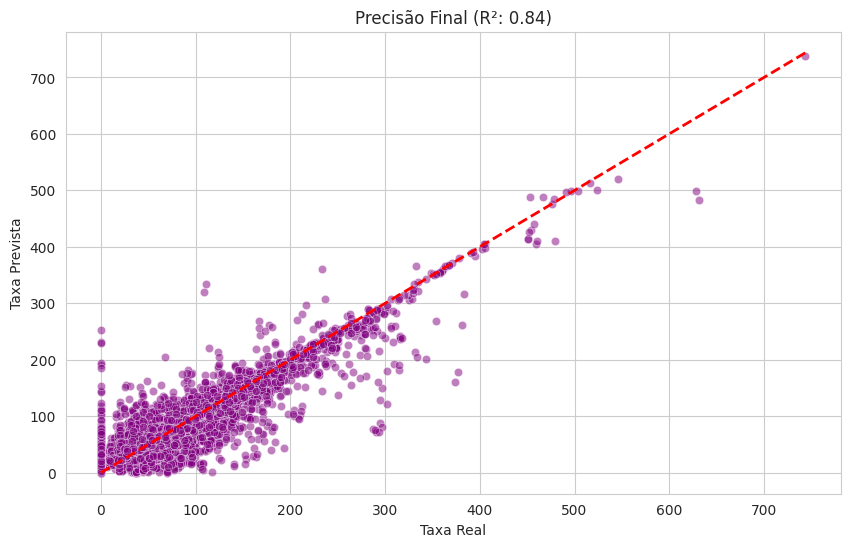

In [16]:
import glob

# cria a linha do tempo 2019 - 2024
arquivos = sorted(glob.glob('dados/crimes_violentos_*.csv'))

lista_dfs = []
for arq in arquivos:
    df_t = pd.read_csv(arq, sep=';', encoding='utf-8')
    lista_dfs.append(df_t)

if lista_dfs:
    df_crimes_full = pd.concat(lista_dfs, ignore_index=True)

    # agrupa por Cidade e Ano
    df_painel = df_crimes_full.groupby(['cod_municipio', 'ano'])['registros'].sum().reset_index()
    df_painel = df_painel.sort_values(['cod_municipio', 'ano'])

    # cálculo do lag -> empurra para o ano da frente os dados
    df_painel['crime_ano_anterior'] = df_painel.groupby('cod_municipio')['registros'].shift(1)

    # remove o primeiro ano (que fica sem histórico)
    df_painel = df_painel.dropna(subset=['crime_ano_anterior'])
    
    # cria chave de junção 
    df_painel['cod_join'] = df_painel['cod_municipio'].astype(str).str[:6]

    # merge com o dataSet temporário
    df_social_temp['cod_join'] = df_social_temp['cod_municipio_6dig'].astype(str).str[:6]
    cols_estaticas = [
        'cod_join', 'populacao', 'PIB', 'IDHM_REF', 
        'matriculas_basica_total', 'matriculas_superior_total',
        'indice_gini', 'taxa_desemprego'
    ]
    
    # merge para o dataSet final de análise
    df_temporal_final = df_painel.merge(df_social_temp[cols_estaticas], on='cod_join', how='inner')

    # cálculo das taxas e treinamento
    df_temporal_final['taxa_crime_alvo'] = (df_temporal_final['registros'] / df_temporal_final['populacao']) * 100000
    df_temporal_final['taxa_crime_ano_anterior'] = (df_temporal_final['crime_ano_anterior'] / df_temporal_final['populacao']) * 100000

    # definição das variáveis
    colunas_X = [
        'taxa_crime_ano_anterior',  
        'indice_gini',              
        'taxa_desemprego',          
        'matriculas_basica_total',  
        'PIB',                      
        'IDHM_REF',                 
        'populacao'                 
    ]

    X = df_temporal_final[colunas_X]
    y = df_temporal_final['taxa_crime_alvo']

    # divisão e treino
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

    # treino do modelo
    rf_temporal = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
    rf_temporal.fit(X_treino, y_treino)

    #resultado do modelo
    score = rf_temporal.score(X_teste, y_teste)
    print(f"\nResultado final: {score:.4f} ({score*100:.1f}%)")

    # gráfico de importância
    importancias = pd.Series(rf_temporal.feature_importances_, index=colunas_X).sort_values(ascending=False)
    print("\n📊 O QUE MAIS IMPACTA O CRIME?")
    print(importancias)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_teste, y=rf_temporal.predict(X_teste), alpha=0.5, color='purple')
    plt.plot([y_teste.min(), y_teste.max()], [y_teste.min(), y_teste.max()], 'r--', lw=2)
    plt.title(f'Precisão Final (R²: {score:.2f})')
    plt.xlabel("Taxa Real")
    plt.ylabel("Taxa Prevista")
    plt.show()

**Conclusão Final:**

  De fato a utilizar uma série temporal da própria taxa de criminalidade funcionou perfeitamente. Obtive um aumento para praticamente 84% de acerto o que torna o modelo satisfatório e útil para a previsão da taxa de criminalidade em Minas Gerais.

**Analise 3**  
  
  Educação -> Matriculas, ingressantes e concluintes

In [17]:
# cria o X e o Y para utilizar os modelos
X_educacao = dataset_analise[colunas_economia + ['total_crimes'] + ['populacao']]
y_mat_basica = dataset_analise['taxa_mat_basica_100k']

# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
X_treino_mat_basica, X_teste_mat_basica, y_treino_mat_basica, y_teste_mat_basica = train_test_split(X_educacao, y_mat_basica, test_size=0.2, random_state=42)


Relatório: Regressão Linear
R² (Explicação): 0.01 (ou 1.5%)
MSE (Erro Quadrático): 9157700.08
RMSE (Erro Médio Real): 3026.17


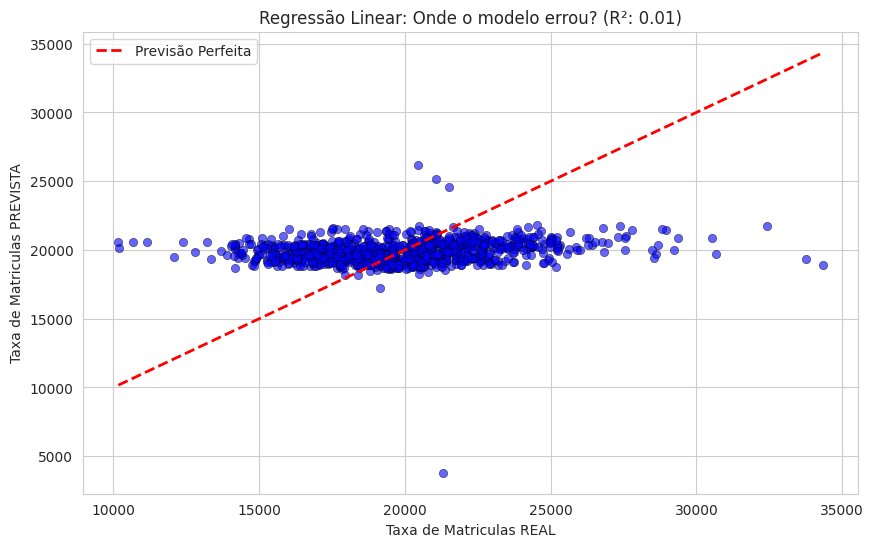

In [18]:
# criação do modelo base de Regressão Linear

# faz o treino do modelo
lin_reg_mat_basica = LinearRegression()
lin_reg_mat_basica.fit(X_treino_mat_basica, y_treino_mat_basica)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_mat_basica = lin_reg_mat_basica.predict(X_teste_mat_basica)

# utiliza as métricas de avaliação
r2_lin_mat_basica = r2_score(y_teste_mat_basica, y_pred_lin_mat_basica)
mse_lin_mat_basica = mean_squared_error(y_teste_mat_basica, y_pred_lin_mat_basica)
rmse_lin_mat_basica = np.sqrt(mse_lin_mat_basica)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_mat_basica:.2f} (ou {r2_lin_mat_basica*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_mat_basica:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_mat_basica:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_basica, y=y_pred_lin_mat_basica, alpha=0.6, color='blue', edgecolor='k')
linha_ideal_mat_basica = np.linspace(y_teste_mat_basica.min(), y_teste_mat_basica.max(), 100)
plt.plot(linha_ideal_mat_basica, linha_ideal_mat_basica, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Matriculas REAL")
plt.ylabel("Taxa de Matriculas PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_mat_basica:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest
R² (Explicação): 0.84 (ou 84.1%)
MSE (Erro Quadrático): 1473717.55
RMSE (Erro Médio Real): 1213.97


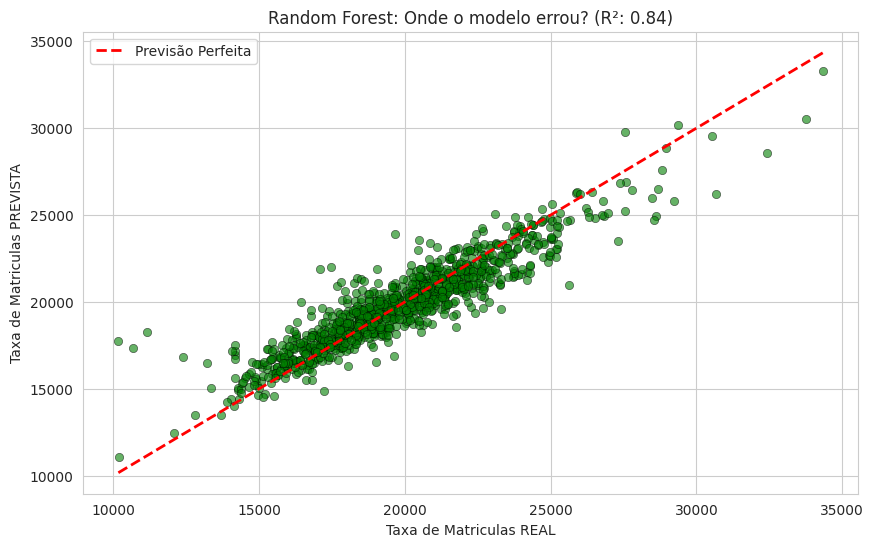

In [19]:
# criação do Randon Forest Regressor para comparação

# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_mat_basica = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mat_basica.fit(X_treino_mat_basica, y_treino_mat_basica)

# faz a previsão
y_pred_rf_mat_basica = rf_mat_basica.predict(X_teste_mat_basica)

# utiliza as métricas de Avaliação
r2_rf_mat_basica = r2_score(y_teste_mat_basica, y_pred_rf_mat_basica)
mse_rf_mat_basica = mean_squared_error(y_teste_mat_basica, y_pred_rf_mat_basica)
rmse_rf_mat_basica = np.sqrt(mse_rf_mat_basica)

# mostra o relatório de Desempenho
print(f"\nRelatório: Random Forest")
print(f"R² (Explicação): {r2_rf_mat_basica:.2f} (ou {r2_rf_mat_basica*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_mat_basica:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_mat_basica:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_basica, y=y_pred_rf_mat_basica, alpha=0.6, color='green', edgecolor='k')
linha_ideal_mat_basica = np.linspace(y_teste_mat_basica.min(), y_teste_mat_basica.max(), 100)
plt.plot(linha_ideal_mat_basica, linha_ideal_mat_basica, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Matriculas REAL")
plt.ylabel("Taxa de Matriculas PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_mat_basica:.2f})")
plt.legend()
plt.show()

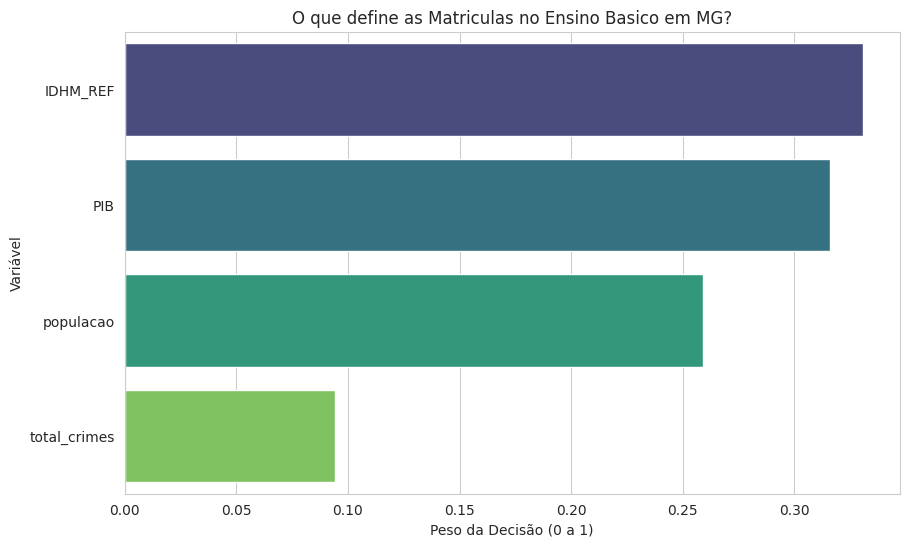

In [20]:
# gráfico para visulização da importância de cada coluna do X
importancias_mat_basica = rf_mat_basica.feature_importances_
nomes_colunas_mat_basica = X_educacao.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_mat_basica = pd.DataFrame({
    'Variável': nomes_colunas_mat_basica,
    'Importância': importancias_mat_basica
}).sort_values(by='Importância', ascending=False) 

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_mat_basica, palette = 'viridis', legend = False)
plt.title('O que define as Matriculas no Ensino Basico em MG?')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()


--- Resultado da Otimização ---
Melhores Parâmetros Encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Desempenho Final (Otimizado)
R² (Explicação): 0.85
MSE (Erro Quadrático): 1440217.38
RMSE (Erro Médio Real): 1200.09


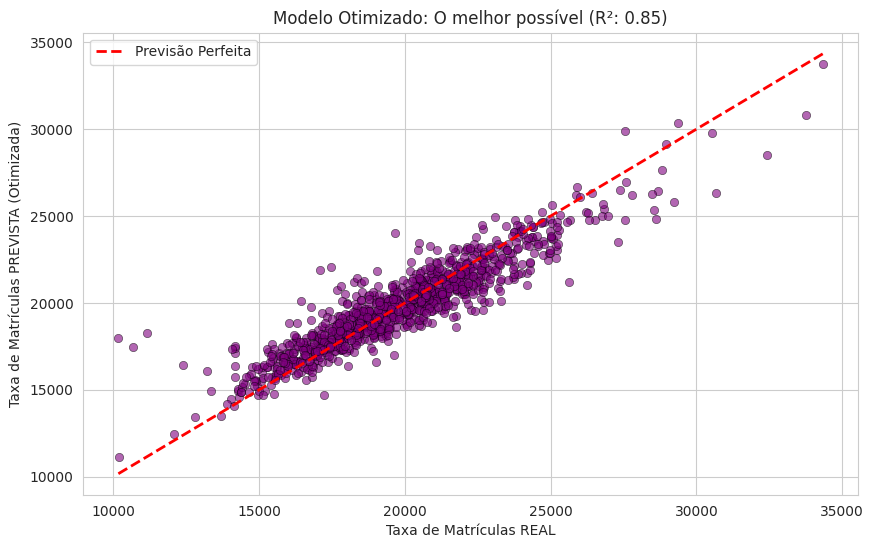

In [21]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2

from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_mat_basica = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
grid_search_mat_basica = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_mat_basica,
    cv=5,                                # validação Cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',    
    n_jobs=-1                            
)

# treino
grid_search_mat_basica.fit(X_treino_mat_basica, y_treino_mat_basica)

# mostra o resultados da otimização
melhor_modelo_mat_basica = grid_search_mat_basica.best_estimator_

print(f"\n--- Resultado da Otimização ---")
print(f"Melhores Parâmetros Encontrados: {grid_search_mat_basica.best_params_}")

# usa as métricas para avaliar o melhor modelo
y_pred_otimizado_mat_basica = melhor_modelo_mat_basica.predict(X_teste_mat_basica)
r2_opt_mat_basica = r2_score(y_teste_mat_basica, y_pred_otimizado_mat_basica)
mse_opt_mat_basica = mean_squared_error(y_teste_mat_basica, y_pred_otimizado_mat_basica)
rmse_opt_mat_basica = np.sqrt(mse_opt_mat_basica)
print(f"\nDesempenho Final (Otimizado)")
print(f"R² (Explicação): {r2_opt_mat_basica:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_mat_basica:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_opt_mat_basica:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_basica, y=y_pred_otimizado_mat_basica, alpha=0.6, color='purple', edgecolor='k')
linha_ideal = np.linspace(y_teste_mat_basica.min(), y_teste_mat_basica.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Matrículas REAL")
plt.ylabel("Taxa de Matrículas PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor possível (R²: {r2_opt_mat_basica:.2f})")
plt.legend()
plt.show()

**Conclusão taxa de matrículas**
   
   Como era de se esperar a taxa de matrícula não é um valor linear, comprovado pelo 0.01 de acerto na Regressão Linear. 
   
   Porém o Randon Forest, principalmente com a melhora na otimização do GridSearch obteve um resultado satisfatório de 85% de acerto, tendo como principais aspectos de relevância o IDH e o PIB do estado. 
  
   É esperado que essa importância se mantenha para os ingressantes, matriculas e concluintes do ensino superior também!


Relatório: Regressão Linear
R² (Explicação): 0.14 (ou 13.5%)
MSE (Erro Quadrático): 5993277.40
RMSE (Erro Médio Real): 2448.12


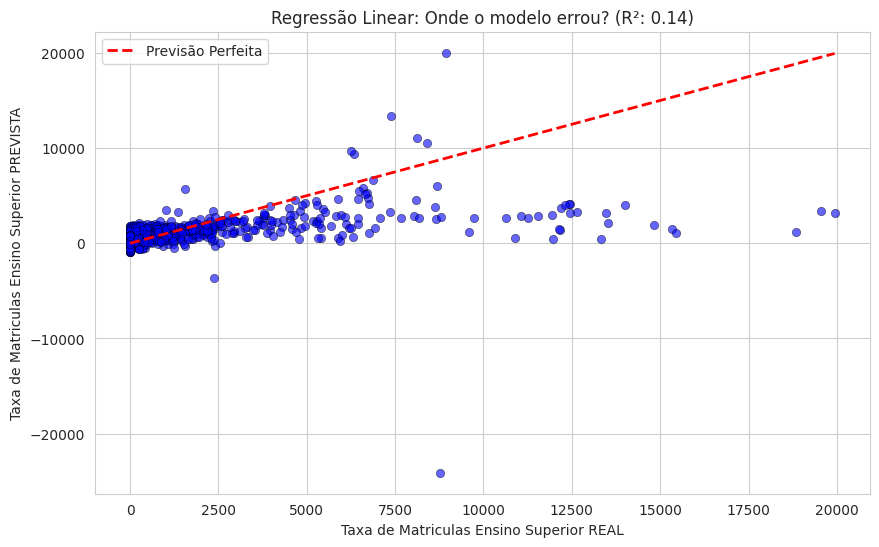

In [22]:
# cria o X e o Y para utilizar os modelos
y_mat_sup = dataset_analise['taxa_mat_superior_100k']

# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
X_treino_mat_sup, X_teste_mat_sup, y_treino_mat_sup, y_teste_mat_sup = train_test_split(X_educacao, y_mat_sup, test_size=0.2, random_state=42)

# criação do modelo base de Regressão Linear
# faz o treino do modelo
lin_reg_mat_sup = LinearRegression()
lin_reg_mat_sup.fit(X_treino_mat_sup, y_treino_mat_sup)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_mat_sup = lin_reg_mat_sup.predict(X_teste_mat_sup)

# utiliza as métricas de avaliação
r2_lin_mat_sup = r2_score(y_teste_mat_sup, y_pred_lin_mat_sup)
mse_lin_mat_sup = mean_squared_error(y_teste_mat_sup, y_pred_lin_mat_sup)
rmse_lin_mat_sup = np.sqrt(mse_lin_mat_sup)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_mat_sup:.2f} (ou {r2_lin_mat_sup*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_mat_sup:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_mat_sup:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_sup, y=y_pred_lin_mat_sup, alpha=0.6, color='blue', edgecolor='k')
linha_ideal_mat_sup = np.linspace(y_teste_mat_sup.min(), y_teste_mat_sup.max(), 100)
plt.plot(linha_ideal_mat_sup, linha_ideal_mat_sup, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Matriculas Ensino Superior REAL")
plt.ylabel("Taxa de Matriculas Ensino Superior PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_mat_sup:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest
R² (Explicação): 0.94 (ou 93.9%)
MSE (Erro Quadrático): 422812.67
RMSE (Erro Médio Real): 650.24


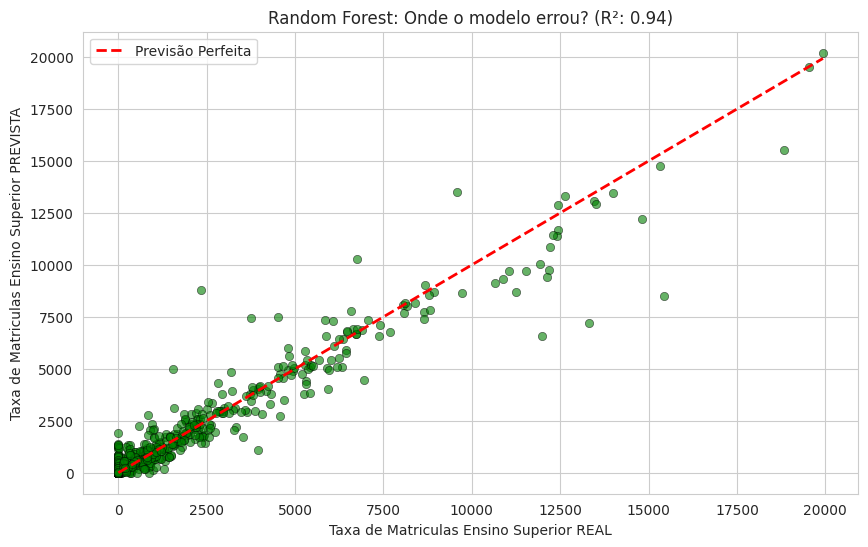

In [23]:
# criação do Randon Forest Regressor para comparação

# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_mat_sup = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mat_sup.fit(X_treino_mat_sup, y_treino_mat_sup)

# faz a previsão
y_pred_rf_mat_sup = rf_mat_sup.predict(X_teste_mat_sup)

# utiliza as métricas de Avaliação
r2_rf_mat_sup = r2_score(y_teste_mat_sup, y_pred_rf_mat_sup)
mse_rf_mat_sup = mean_squared_error(y_teste_mat_sup, y_pred_rf_mat_sup)
rmse_rf_mat_sup = np.sqrt(mse_rf_mat_sup)

# mostra o relatório de Desempenho
print(f"\nRelatório: Random Forest")
print(f"R² (Explicação): {r2_rf_mat_sup:.2f} (ou {r2_rf_mat_sup*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_mat_sup:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_mat_sup:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_sup, y=y_pred_rf_mat_sup, alpha=0.6, color='green', edgecolor='k')
linha_ideal_mat_sup = np.linspace(y_teste_mat_sup.min(), y_teste_mat_sup.max(), 100)
plt.plot(linha_ideal_mat_sup, linha_ideal_mat_sup, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Matriculas Ensino Superior REAL")
plt.ylabel("Taxa de Matriculas Ensino Superior PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_mat_sup:.2f})")
plt.legend()
plt.show()

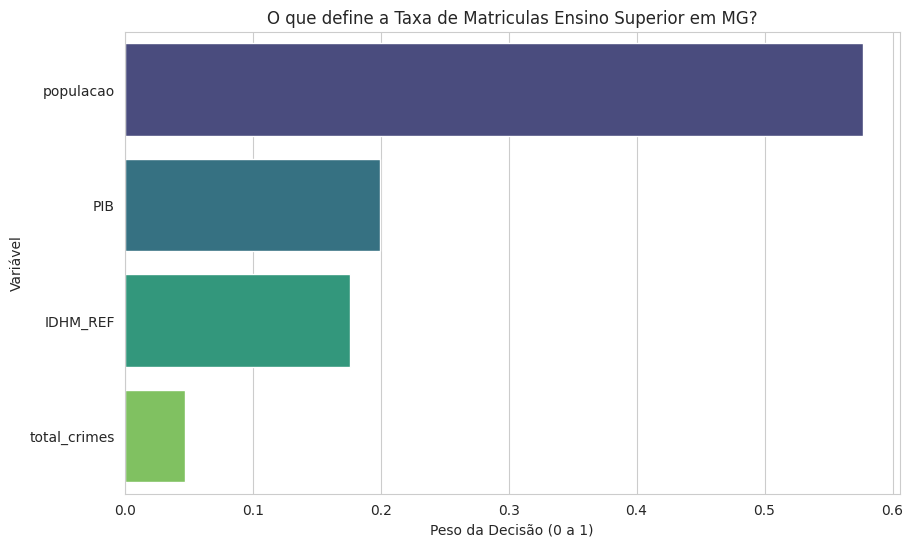

In [24]:
# gráfico para visulização da importância de cada coluna do X
importancias_mat_sup = rf_mat_sup.feature_importances_
nomes_colunas_mat_sup = X_educacao.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_mat_sup = pd.DataFrame({
    'Variável': nomes_colunas_mat_sup,
    'Importância': importancias_mat_sup
}).sort_values(by='Importância', ascending=False) 

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_mat_sup, palette = 'viridis', legend = False)
plt.title('O que define a Taxa de Matriculas Ensino Superior em MG?')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()


Resultado da Otimização
Melhores Parâmetros Encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

--- Desempenho Final (Otimizado) ---
R² (Explicação): 0.94
MSE (Erro Quadrático): 416640.04
RMSE (Erro Médio Real): 645.48


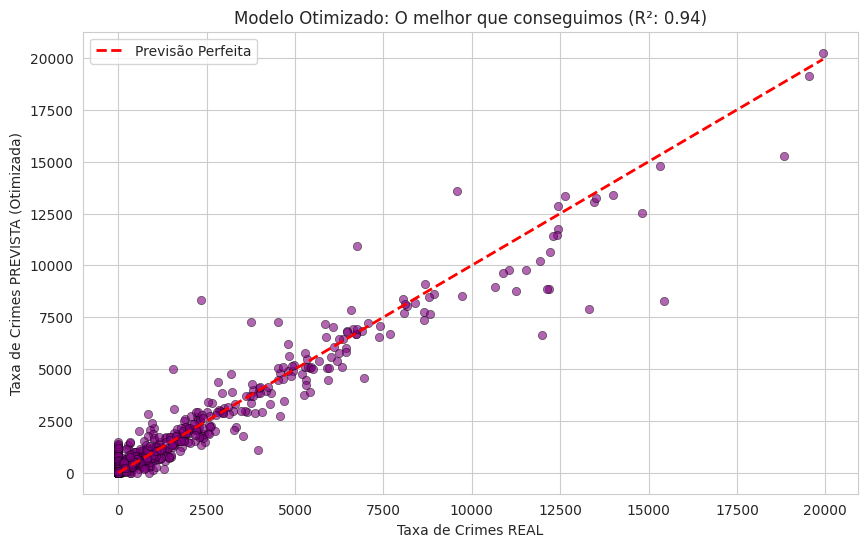

In [25]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2
from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_mat_sup = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
grid_search_mat_sup = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_mat_sup,
    cv=5,                                # Validação Cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',    
    n_jobs=-1                            
)

# treino
grid_search_mat_sup.fit(X_treino_mat_sup, y_treino_mat_sup)

# usa as métricas para avaliar o melhor modelo
melhor_modelo_mat_sup = grid_search_mat_sup.best_estimator_
print(f"\nResultado da Otimização")
print(f"Melhores Parâmetros Encontrados: {grid_search_mat_sup.best_params_}")
y_pred_otimizado_mat_sup = melhor_modelo_mat_sup.predict(X_teste_mat_sup)
r2_opt_mat_sup= r2_score(y_teste_mat_sup, y_pred_otimizado_mat_sup)
mse_opt_mat_sup = mean_squared_error(y_teste_mat_sup, y_pred_otimizado_mat_sup)
rmse_opt_mat_sup = np.sqrt(mse_opt_mat_sup)
print(f"\n--- Desempenho Final (Otimizado) ---")
print(f"R² (Explicação): {r2_opt_mat_sup:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_mat_sup:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_opt_mat_sup:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_mat_sup, y=y_pred_otimizado_mat_sup, alpha=0.6, color='purple', edgecolor='k')
linha_ideal = np.linspace(y_teste_mat_sup.min(), y_teste_mat_sup.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor que conseguimos (R²: {r2_opt_mat_sup:.2f})")
plt.legend()
plt.show()

**Conclusão taxa de matrículas superior**
   
   Diferente do que esperava a população foi o mais importante para as matrículas, pensando melhor faz sentido já que nem todas as pequenas cidades tem faculdade, estando concentradas em cidades com populações maiores.

   A tendência deve contiar nos ingressantes e concluintes.


Relatório: Regressão Linear
R² (Explicação): 0.14 (ou 14.4%)
MSE (Erro Quadrático): 856583.02
RMSE (Erro Médio Real): 925.52


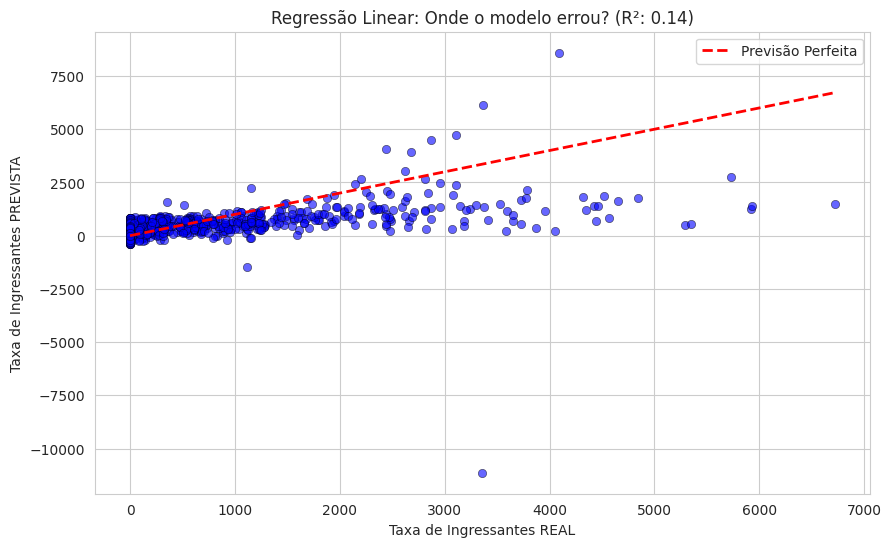

In [26]:
# cria o X e o Y para utilizar os modelos
y_ing_total = dataset_analise['taxa_ingressantes_sup_100k']

# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
X_treino_ing_total, X_teste_ing_total, y_treino_ing_total, y_teste_ing_total = train_test_split(X_educacao, y_ing_total, test_size=0.2, random_state=42)

# criação do modelo base de Regressão Linear
# faz o treino do modelo
lin_reg_ing_total = LinearRegression()
lin_reg_ing_total.fit(X_treino_ing_total, y_treino_ing_total)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_ing_total = lin_reg_ing_total.predict(X_teste_ing_total)

# utiliza as métricas de avaliação
r2_lin_ing_total = r2_score(y_teste_ing_total, y_pred_lin_ing_total)
mse_lin_ing_total = mean_squared_error(y_teste_ing_total, y_pred_lin_ing_total)
rmse_lin_ing_total = np.sqrt(mse_lin_ing_total)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_ing_total:.2f} (ou {r2_lin_ing_total*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_ing_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_ing_total:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_ing_total, y=y_pred_lin_ing_total, alpha=0.6, color='blue', edgecolor='k')
linha_ideal = np.linspace(y_teste_ing_total.min(), y_teste_ing_total.max(), 100)
plt.plot(linha_ideal, linha_ideal, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Ingressantes REAL")
plt.ylabel("Taxa de Ingressantes PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_ing_total:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest
R² (Explicação): 0.90 (ou 90.4%)
MSE (Erro Quadrático): 96491.58
RMSE (Erro Médio Real): 310.63


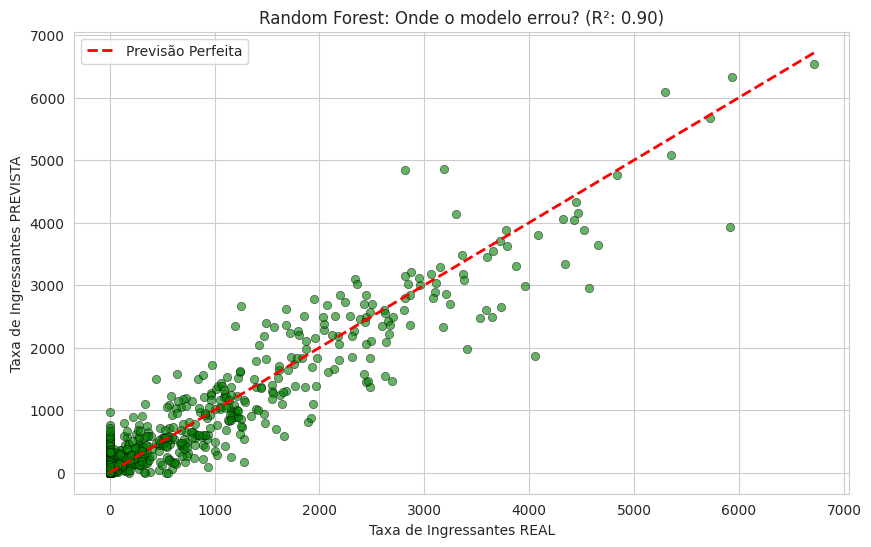

In [27]:
# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_ing_total = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ing_total.fit(X_treino_ing_total, y_treino_ing_total)

# faz a previsão
y_pred_rf_ing_total = rf_ing_total.predict(X_teste_ing_total)

# utiliza as métricas de avaliação
r2_rf_ing_total = r2_score(y_teste_ing_total, y_pred_rf_ing_total)
mse_rf_ing_total= mean_squared_error(y_teste_ing_total, y_pred_rf_ing_total)
rmse_rf_ing_total = np.sqrt(mse_rf_ing_total)

# mostra o relatório de desempenho
print(f"\nRelatório: Random Forest")
print(f"R² (Explicação): {r2_rf_ing_total:.2f} (ou {r2_rf_ing_total*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_ing_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_ing_total:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_ing_total, y=y_pred_rf_ing_total, alpha=0.6, color='green', edgecolor='k')
linha_ideal_ing_total = np.linspace(y_teste_ing_total.min(), y_teste_ing_total.max(), 100)
plt.plot(linha_ideal_ing_total, linha_ideal_ing_total, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Ingressantes REAL")
plt.ylabel("Taxa de Ingressantes PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_ing_total:.2f})")
plt.legend()
plt.show()

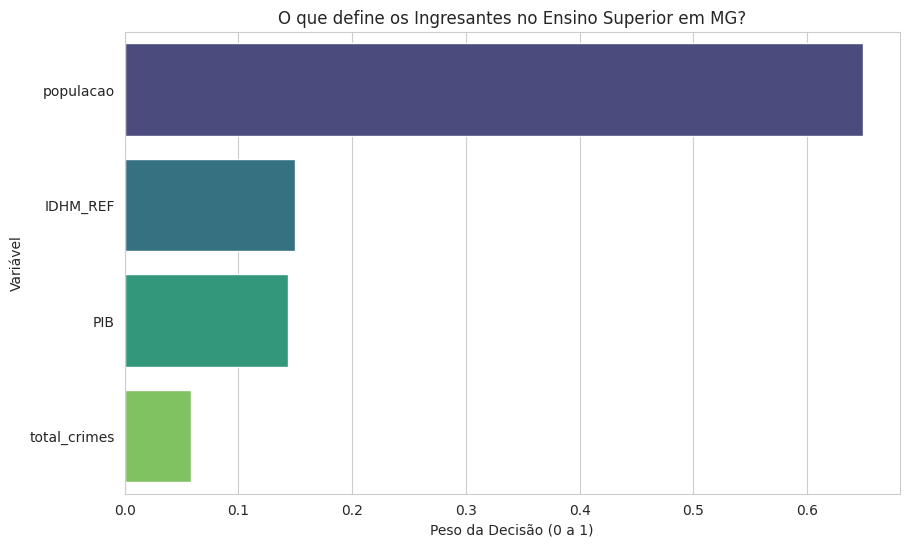

In [28]:
# gráfico para visulização da importância de cada coluna do X
importancias_ing_total = rf_ing_total.feature_importances_
nomes_colunas_ing_total = X_educacao.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_ing_total = pd.DataFrame({
    'Variável': nomes_colunas_ing_total,
    'Importância': importancias_ing_total
}).sort_values(by='Importância', ascending=False) 

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_ing_total, palette = 'viridis', legend = False)
plt.title('O que define os Ingresantes no Ensino Superior em MG?')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()


Resultado da Otimização
Melhores Parâmetros Encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Desempenho Final (Otimizado)
R² (Explicação): 0.90
MSE (Erro Quadrático): 97930.01
RMSE (Erro Médio Real): 312.94


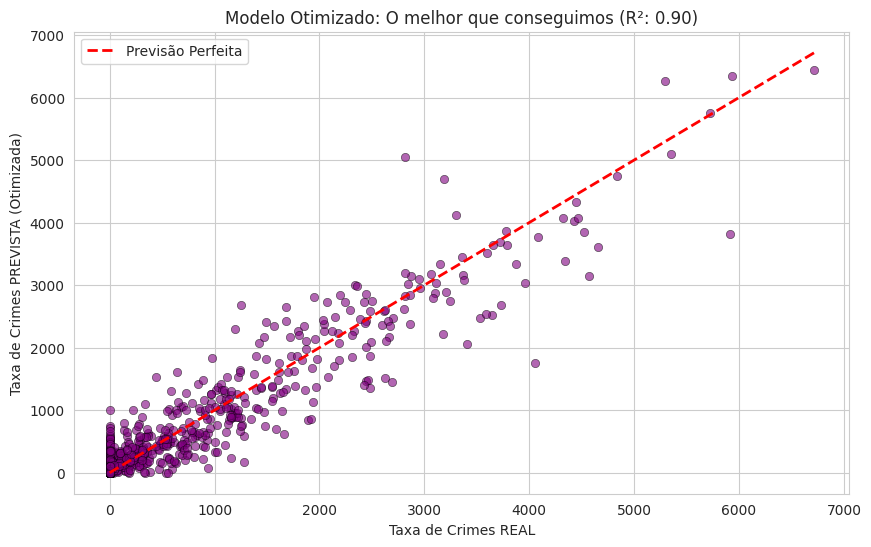

In [29]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2
from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_ing_total = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
grid_search_ing_total = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_ing_total,
    cv=5,                                # validação Cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',    
    n_jobs=-1                            
)

# treino
grid_search_ing_total.fit(X_treino_ing_total, y_treino_ing_total)

# mostra o resultados da otimização
melhor_modelo_ing_total = grid_search_ing_total.best_estimator_

print(f"\nResultado da Otimização")
print(f"Melhores Parâmetros Encontrados: {grid_search_ing_total.best_params_}")

# usa as métricas para avaliar o melhor modelo
y_pred_otimizado_ing_total = melhor_modelo_ing_total.predict(X_teste_ing_total)

r2_opt_ing_total = r2_score(y_teste_ing_total, y_pred_otimizado_ing_total)
mse_opt_ing_total = mean_squared_error(y_teste_ing_total, y_pred_otimizado_ing_total)
rmse_opt_ing_total = np.sqrt(mse_opt_ing_total)

print(f"\nDesempenho Final (Otimizado)")
print(f"R² (Explicação): {r2_opt_ing_total:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_ing_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_opt_ing_total:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_ing_total, y=y_pred_otimizado_ing_total, alpha=0.6, color='purple', edgecolor='k')
linha_ideal_ing_total = np.linspace(y_teste_ing_total.min(), y_teste_ing_total.max(), 100)
plt.plot(linha_ideal_ing_total, linha_ideal_ing_total, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor que conseguimos (R²: {r2_opt_ing_total:.2f})")
plt.legend()
plt.show()

**Conclusão taxa de ingressantes superior**
   
   Como esperado a população manda como principal fator para os ingressantes na educação superior, assim como nas matrículas


Relatório: Regressão Linear
R² (Explicação): 0.16 (ou 15.6%)
MSE (Erro Quadrático): 129355.39
RMSE (Erro Médio Real): 359.66


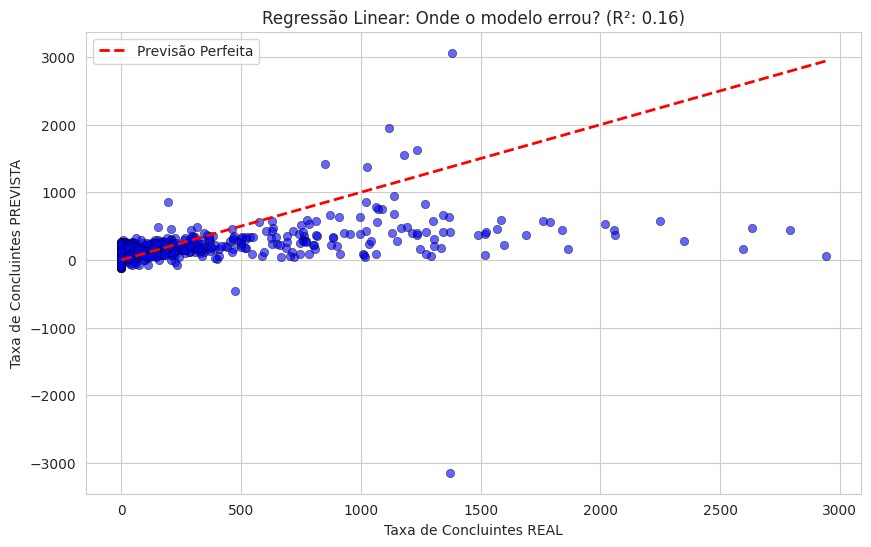

In [30]:
# cria o X e o Y para utilizar os modelos
y_conc_total = dataset_analise['taxa_concluintes_sup_100k']
# cria os treinos para que o modelo use apenas 80% dos dados e teste nos outros 20% para se ter as métricas de precisão
X_treino_conc_total, X_teste_conc_total, y_treino_conc_total, y_teste_conc_total= train_test_split(X_educacao, y_conc_total, test_size=0.2, random_state=42)

# criação do modelo base de Regressão Linear

# faz o treino do modelo
lin_reg_conc_total = LinearRegression()
lin_reg_conc_total.fit(X_treino_conc_total, y_treino_conc_total)

# faz a previsão (usando dados de teste que o modelo nunca viu)
y_pred_lin_conc_total = lin_reg_conc_total.predict(X_teste_conc_total)

# utiliza as métricas de avaliação
r2_lin_conc_total = r2_score(y_teste_conc_total, y_pred_lin_conc_total)
mse_lin_conc_total = mean_squared_error(y_teste_conc_total, y_pred_lin_conc_total)
rmse_lin_conc_total = np.sqrt(mse_lin_conc_total)

# mostra o relatório de desempenho
print(f"\nRelatório: Regressão Linear")
print(f"R² (Explicação): {r2_lin_conc_total:.2f} (ou {r2_lin_conc_total*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_lin_conc_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_lin_conc_total:.2f}")

# cria o gráfico comparando o que é real com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_conc_total, y=y_pred_lin_conc_total, alpha=0.6, color='blue', edgecolor='k')
linha_ideal_conc_total = np.linspace(y_teste_conc_total.min(), y_teste_conc_total.max(), 100)
plt.plot(linha_ideal_conc_total, linha_ideal_conc_total, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Concluintes REAL")
plt.ylabel("Taxa de Concluintes PREVISTA")
plt.title(f"Regressão Linear: Onde o modelo errou? (R²: {r2_lin_conc_total:.2f})")
plt.legend()
plt.show()


Relatório: Random Forest
R² (Explicação): 0.89 (ou 89.4%)
MSE (Erro Quadrático): 16202.91
RMSE (Erro Médio Real): 127.29


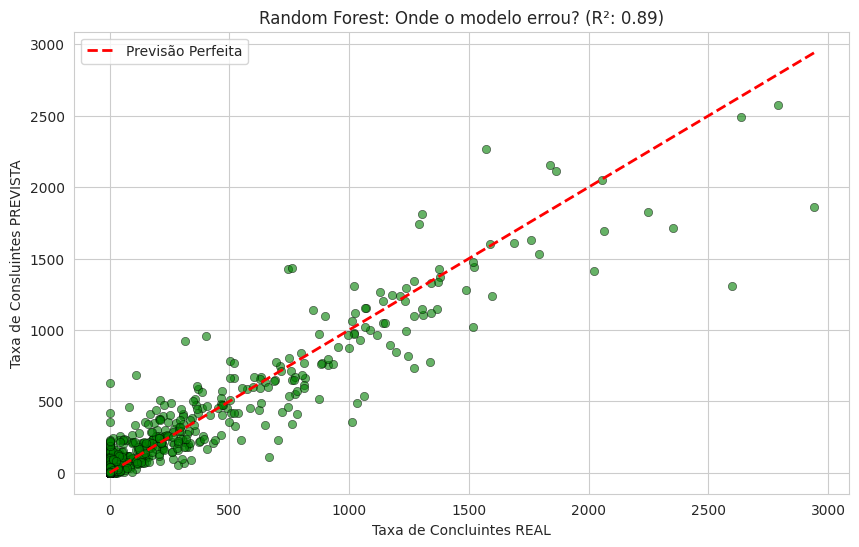

In [31]:
# criação do Randon Forest Regressor para comparação
# treinamento usando 100 árvores inicialmente (padrão atual do scikit-learn)
rf_conc_total = RandomForestRegressor(n_estimators=100, random_state=42)
rf_conc_total.fit(X_treino_conc_total, y_treino_conc_total)

# faz a previsão
y_pred_rf_conc_total = rf_conc_total.predict(X_teste_conc_total)

# utiliza as métricas de avaliação
r2_rf_conc_total = r2_score(y_teste_conc_total, y_pred_rf_conc_total)
mse_rf_conc_total = mean_squared_error(y_teste_conc_total, y_pred_rf_conc_total)
rmse_rf_conc_total = np.sqrt(mse_rf_conc_total)

# mostra o relatório de desempenho
print(f"\nRelatório: Random Forest")
print(f"R² (Explicação): {r2_rf_conc_total:.2f} (ou {r2_rf_conc_total*100:.1f}%)")
print(f"MSE (Erro Quadrático): {mse_rf_conc_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_rf_conc_total:.2f}")

# cria o gráfico para visualização do real em comparação com o previsto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_conc_total, y=y_pred_rf_conc_total, alpha=0.6, color='green', edgecolor='k')
linha_ideal_conc_total = np.linspace(y_teste_conc_total.min(), y_teste_conc_total.max(), 100)
plt.plot(linha_ideal_conc_total, linha_ideal_conc_total, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Concluintes REAL")
plt.ylabel("Taxa de Consluintes PREVISTA")
plt.title(f"Random Forest: Onde o modelo errou? (R²: {r2_rf_conc_total:.2f})")
plt.legend()
plt.show()

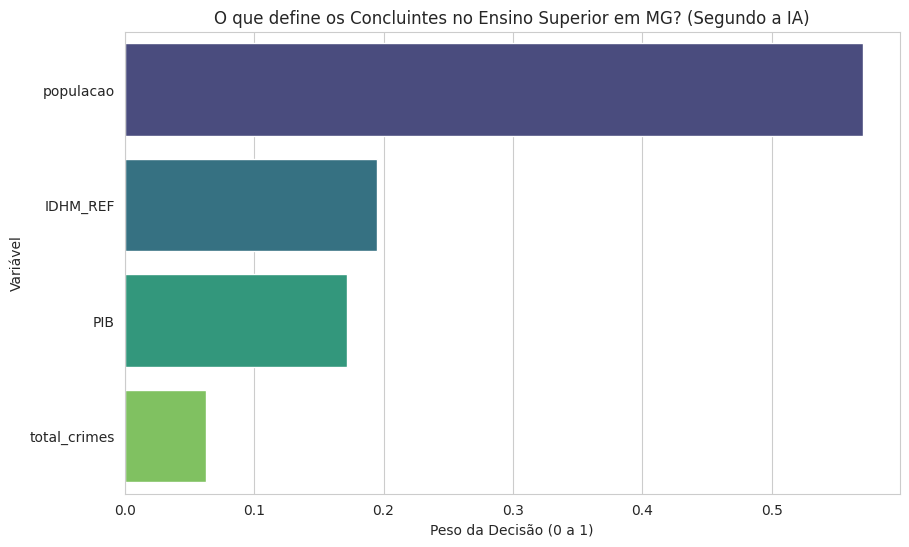

In [32]:
# gráfico para visulização da importância de cada coluna do X
importancias_conc_total = rf_conc_total.feature_importances_
nomes_colunas_conc_total = X_educacao.columns

# cria um dataFrame bonitinho para o gráfico
df_importancia_conc_total = pd.DataFrame({
    'Variável': nomes_colunas_conc_total,
    'Importância': importancias_conc_total
}).sort_values(by='Importância', ascending=False) # ordena do maior para o menor

# mostra o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importância', y = 'Variável', hue = 'Variável', data = df_importancia_conc_total, palette = 'viridis', legend = False)
plt.title('O que define os Concluintes no Ensino Superior em MG? (Segundo a IA)')
plt.xlabel('Peso da Decisão (0 a 1)')
plt.show()


Resultado da Otimização
Melhores Parâmetros Encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Desempenho Final (Otimizado)
R² (Explicação): 0.90
MSE (Erro Quadrático): 15639.21
RMSE (Erro Médio Real): 125.06


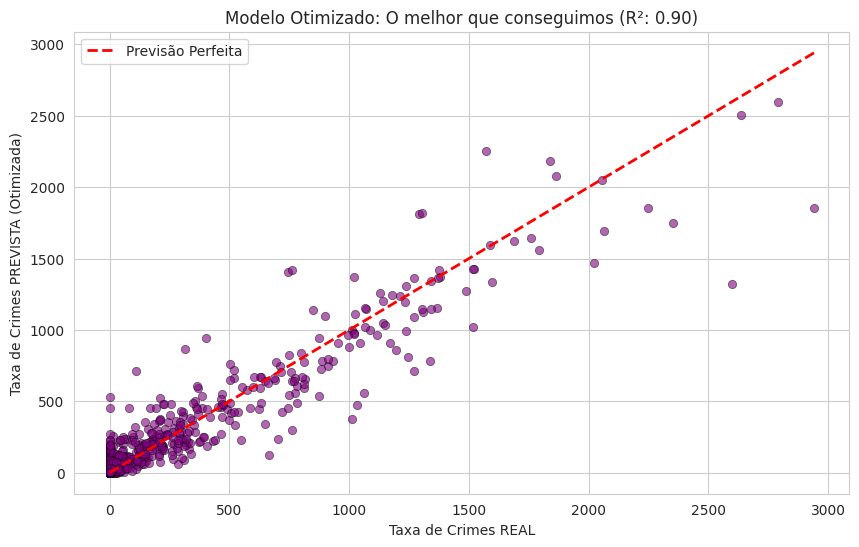

In [33]:
# otimização dos hiperparâmetros com o GridSearch para ver se aumenta o r2
from sklearn.model_selection import GridSearchCV

# definição da grade de parâmetros que serão testados para buscar o melhor
param_grid_conc_total = {
    'n_estimators': [50, 100, 200],      # quantidade de árvores na floresta
    'max_depth': [10, 20, None],         # profundidade máxima 
    'min_samples_split': [2, 5, 10]      # mínimo de dados para criar uma nova regra
}

# configuração do GridSearch
grid_search_conc_total = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_conc_total,
    cv=5,                                # validação Cruzada (divide o treino em 5 partes)
    scoring='neg_mean_squared_error',   
    n_jobs=-1                            
)

# treino
grid_search_conc_total.fit(X_treino_conc_total, y_treino_conc_total)

# mostra o resultados da otimização
melhor_modelo_conc_total = grid_search_conc_total.best_estimator_

print(f"\nResultado da Otimização")
print(f"Melhores Parâmetros Encontrados: {grid_search_conc_total.best_params_}")

# usa as métricas para avaliar o melhor modelo
y_pred_otimizado_conc_total = melhor_modelo_conc_total.predict(X_teste_conc_total)
r2_opt_conc_total = r2_score(y_teste_conc_total, y_pred_otimizado_conc_total)
mse_opt_conc_total = mean_squared_error(y_teste_conc_total, y_pred_otimizado_conc_total)
rmse_opt_conc_total = np.sqrt(mse_opt_conc_total)
print(f"\nDesempenho Final (Otimizado)")
print(f"R² (Explicação): {r2_opt_conc_total:.2f}")
print(f"MSE (Erro Quadrático): {mse_opt_conc_total:.2f}")
print(f"RMSE (Erro Médio Real): {rmse_opt_conc_total:.2f}")

# gráfico para visualização do otimizado vs ideal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_teste_conc_total, y=y_pred_otimizado_conc_total, alpha=0.6, color='purple', edgecolor='k')
linha_ideal_conc_total = np.linspace(y_teste_conc_total.min(), y_teste_conc_total.max(), 100)
plt.plot(linha_ideal_conc_total, linha_ideal_conc_total, color='red', linestyle='--', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Taxa de Crimes REAL")
plt.ylabel("Taxa de Crimes PREVISTA (Otimizada)")
plt.title(f"Modelo Otimizado: O melhor que conseguimos (R²: {r2_opt_conc_total:.2f})")
plt.legend()
plt.show()

**Conclusão taxa de concluintes superior**
   
   Novamente como o esperado, os concluintes da educação superior seguiu a tendência dos demais dados da educação superior e também possui a população como principal fator.

Para uma vizualização bonita sera gerado um mapa para vizualizar onde as taxas são maiores!

In [39]:
import folium
import requests
import json
import os
from IPython.display import display, IFrame

# configurando os caminhos
PASTA_DADOS = 'dados' 
ARQUIVO_DADOS = os.path.join(PASTA_DADOS, 'dataset_limpo.csv')
ARQUIVO_NOMES = os.path.join(PASTA_DADOS, '7272-municipiosmg.csv')
ARQUIVO_SAIDA_MAPA = 'mapa_mg_final.html'

# carregamento e tratamento do csv
try:
    dataset_analise = pd.read_csv(ARQUIVO_DADOS)
    
    # Tenta ler nomes com codificação 'latin1' (padrão Brasil antigo) ou 'utf-8'
    try:
        df_nomes = pd.read_csv(ARQUIVO_NOMES, sep=';', encoding='latin1')
    except:
        df_nomes = pd.read_csv(ARQUIVO_NOMES, sep=';', encoding='utf-8')
        

    # padronizando as chaves
    dataset_analise['cod_municipio_str'] = dataset_analise['cod_municipio_6dig'].astype(str).str[:6]
    df_nomes['cod_join'] = df_nomes['cod_mun_ibge'].astype(str).str[:6]

    # adiciona o nome dos municípios
    if 'municipio' in dataset_analise.columns:
        dataset_analise = dataset_analise.drop(columns=['municipio'])

    dataset_analise = dataset_analise.merge(
        df_nomes[['cod_join', 'municipio']], 
        left_on='cod_municipio_str', 
        right_on='cod_join', 
        how='left'
    )

    # remove duplicatas para o mapa não travar
    dataset_analise = dataset_analise.drop_duplicates(subset=['cod_municipio_str'])

    # cria um dicionário de busca rápida
    dados_dict = dataset_analise.set_index('cod_municipio_str').to_dict('index')

    # gera o mapa
    url_geojson = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-31-mun.json'
    geo_json_data = requests.get(url_geojson).json()

    # injeta os dados no mapa
    for feature in geo_json_data['features']:
        codigo_mapa = str(feature['properties']['id'])[:6]
        feature['properties']['id_match'] = codigo_mapa 
        
        if codigo_mapa in dados_dict:
            cidade = dados_dict[codigo_mapa]
            feature['properties']['nome_cidade'] = cidade.get('municipio', 'Desconhecido')
            feature['properties']['v_crime']    = round(cidade.get('taxa_crime_100k', 0), 1)
            feature['properties']['v_basica']   = round(cidade.get('taxa_mat_basica_100k', 0), 1)
            feature['properties']['v_superior'] = round(cidade.get('taxa_mat_superior_100k', 0), 1)
            feature['properties']['v_ingress']  = round(cidade.get('taxa_ingressantes_sup_100k', 0), 1)
            feature['properties']['v_conclu']   = round(cidade.get('taxa_concluintes_sup_100k', 0), 1)
        else:
            feature['properties']['nome_cidade'] = "N/A"
            feature['properties']['v_crime'] = 0

    # cria camadas no mapa
    def criar_camada(nome, col_dados, prop_json, cor, alias):
        camada = folium.Choropleth(
            geo_data=geo_json_data,
            name=nome,
            data=dataset_analise,
            columns=['cod_municipio_str', col_dados],
            key_on='feature.properties.id_match',
            fill_color=cor,
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=nome
        )
        folium.features.GeoJsonTooltip(
            fields=['nome_cidade', prop_json],
            aliases=['Cidade:', f'{alias}:'],
            style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
        ).add_to(camada.geojson)
        return camada

    # montagem final
    mapa = folium.Map(location=[-18.5122, -44.5550], zoom_start=6)

    criar_camada('Taxa Crime', 'taxa_crime_100k', 'v_crime', 'YlOrRd', 'Crimes/100k').add_to(mapa)
    criar_camada('Ed. Básica', 'taxa_mat_basica_100k', 'v_basica', 'YlGn', 'Matrículas').add_to(mapa)
    criar_camada('Ed. Superior', 'taxa_mat_superior_100k', 'v_superior', 'PuBu', 'Superior').add_to(mapa)
    criar_camada('Ingressantes', 'taxa_ingressantes_sup_100k', 'v_ingress', 'PuBuGn', 'Novos Alunos').add_to(mapa)
    criar_camada('Concluintes', 'taxa_concluintes_sup_100k', 'v_conclu', 'BuPu', 'Formandos').add_to(mapa)

    folium.LayerControl().add_to(mapa)

    # mostra e salva o mapa
    mapa.save(ARQUIVO_SAIDA_MAPA)

except Exception as e:
    print(f"\nOCORREU UM ERRO: {e}")

**Abrir o mapa (mapa_mg_final) com algum navegador!!**

TABELA GERAL DE PERFORMANCE (TODOS OS DADOS)


,Alvo (Target),Modelo,R² (Precisão)
0,Total Crimes,Regressão Linear,"0,75"
1,Total Crimes,Random Forest (Otimizado),"0,85"
2,Taxa Crimes,Regressão Linear,"0,25"
3,Taxa Crimes,Random Forest (Otimizado),"0,84"
4,Taxa matrículas (Básica),Regressão Linear,"0,01"
5,Taxa matrículas (Básica),Random Forest (Otimizado),"0,85"
6,Taxa matrículas (Superior),Regressão Linear,"0,14"
7,Taxa matrículas (Superior),Random Forest (Otimizado),"0,94"
8,Taxa ingressantes,Regressão Linear,"0,14"
9,Taxa ingressantes,Random Forest (Otimizado),"0,90"


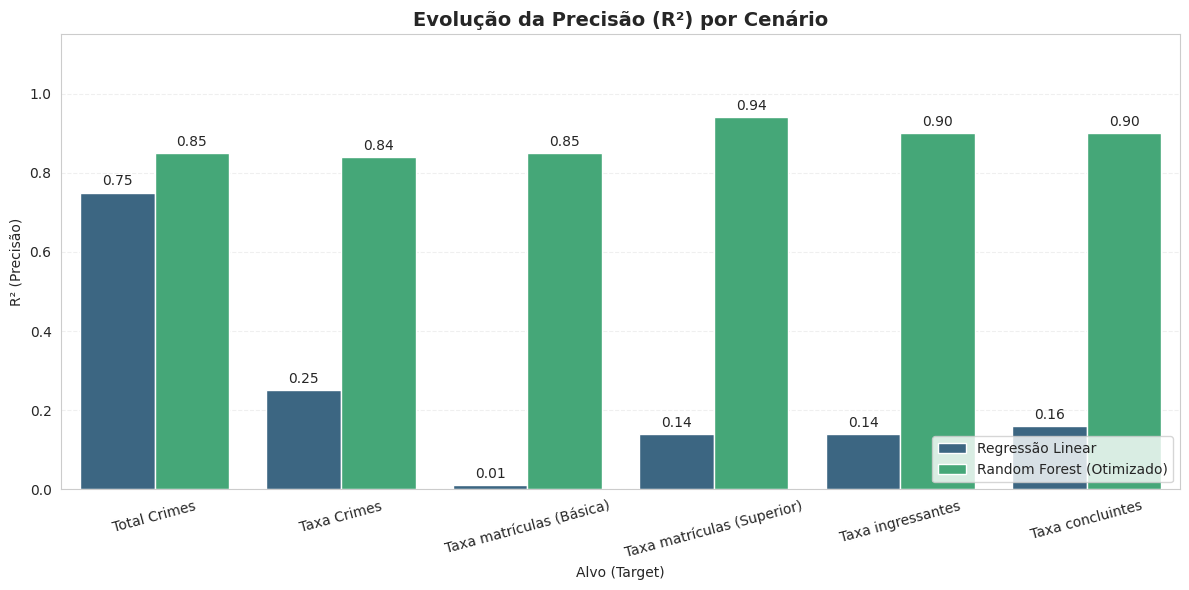

In [36]:
# tabela de comparação dos modelos
dados_completo = {
    'Alvo (Target)': [
        'Total Crimes', 'Total Crimes',
        'Taxa Crimes', 'Taxa Crimes',
        'Taxa matrículas (Básica)', 'Taxa matrículas (Básica)',
        'Taxa matrículas (Superior)', 'Taxa matrículas (Superior)',
        'Taxa ingressantes', 'Taxa ingressantes',
        'Taxa concluintes', 'Taxa concluintes'
    ],
    'Modelo': [
        'Regressão Linear', 'Random Forest (Otimizado)',
        'Regressão Linear', 'Random Forest (Otimizado)',
        'Regressão Linear', 'Random Forest (Otimizado)',
        'Regressão Linear', 'Random Forest (Otimizado)',
        'Regressão Linear', 'Random Forest (Otimizado)',
        'Regressão Linear', 'Random Forest (Otimizado)'
    ],
    # R²: quanto mais perto de 1.0, melhor a explicação
    'R² (Precisão)': [
        0.75, 0.85,  # crime Total
        0.25, 0.84,  # taxa Crime
        0.01, 0.85,  # taxa básica 
        0.14, 0.94,  # taxa superior 
        0.14, 0.90,  # taxa ingressantes superior
        0.16, 0.90   # taxa concluintes superior
    ]
}

df_full = pd.DataFrame(dados_completo)

# tabela bonitinha
def estilizar_tabela_completa(styler):
    styler.set_caption("Comparativo Geral: Linear vs Random Forest")
    styler.format(precision=2, thousands=".", decimal=",")
    
    # dastaca o RandonForest em verde
    styler.apply(lambda x: ['background-color: #d1e7dd; font-weight: bold; color: #0f5132' 
                            if v == 'Random Forest (Otimizado)' else '' for v in x], subset=['Modelo'])
    
    # barra para vizualizar a precisão
    styler.bar(subset=['R² (Precisão)'], color='#5fba7d', vmin=0, vmax=1)
    return styler

print("TABELA GERAL DE PERFORMANCE (TODOS OS DADOS)")
display(estilizar_tabela_completa(df_full.style))

# Gráfico de Comparação (R²) 
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_full, x='Alvo (Target)', y='R² (Precisão)', hue='Modelo', palette='viridis')

plt.title("Evolução da Precisão (R²) por Cenário", fontsize=14, fontweight='bold')
plt.ylim(0, 1.15) 
plt.xticks(rotation=15) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(loc='lower right')

# coloca os valores em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

**Conclusão do Desempenho dos Modelos**

  Os modelos de RandonForest foram superior em todos os aspectos em todas as variáveis testadas, isso se deve muito a não linearidade dos dados, principalmente as taxas.

  Entretanto se os dados fossem como o total de crimes ou o total de matrículas, a discrepância entre os modelos seria menor.

A partir de agora analizarei políticas públicas que podem ajudar a aumentar as taxas de educação e de que podem ajudar a dimuniar a taxa de criminalidade.

In [37]:
# simulação: oque aconteceria com a taxa de matrículas se o IDH do estado subisse 2%

# definição das colunas
colunas_educacao_feat = ['PIB', 'IDHM_REF', 'total_crimes', 'populacao']

# cenário atual
df_cenario_educ = dataset_analise.copy()
df_cenario_educ['previsao_base'] = rf_mat_basica.predict(df_cenario_educ[colunas_educacao_feat])

# cenário futuro (aumento do IDH em 2%)
df_cenario_educ['IDHM_REF'] = df_cenario_educ['IDHM_REF'] * 1.02

# previsão com novo IDH
df_cenario_educ['previsao_novo_idh'] = rf_mat_basica.predict(df_cenario_educ[colunas_educacao_feat])

# calcular o Ganho de Alunos (Taxa)
df_cenario_educ['ganho_matriculas'] = df_cenario_educ['previsao_novo_idh'] - df_cenario_educ['previsao_base']

# resultado
media_ganho = df_cenario_educ['ganho_matriculas'].mean()

print(f"\nRESULTADO NA EDUCAÇÃO:")
print(f"Com o aumento do IDH, a taxa de matrículas básicas teria diferença de: {media_ganho:.2f} pontos.")


RESULTADO NA EDUCAÇÃO:
Com o aumento do IDH, a taxa de matrículas básicas teria diferença de: -258.44 pontos.


**Conclusão:**

  Diferentemente do que esperava o aumento do IDH causou uma queda na taxa de matrículas no ensino básico. Isso quer dizer que cidades mais desenvolvidas tem uma menor tendência a ter crianças estudando no ensino básico.

  Portanto isso quer dizer que se o governo do estado fizer programas como de transferência de renda (Bolsa Família, Pé de Meia), expansão da rede de saúde (Farmácia Popular), investimentos em saneamento básico e educação, além de ações de segurança alimentar que aumentariam o IDH, a tendência é que as famílias tenham menos filhos e menos ingressantes no ensino básico.

**Aumento da Taxa de Matrículas no ensino superior**

  Como o principal fator das matrículas no ensino superior é a população, isso quer dizer apenas que em cidades mais populosas tem mais faculdades e consequentemente mais alunos. 

  Para aumentar esse fator em cidades menores a solução é a criação de faculdades públicas nessas cidades que facilitaria para os estudantes que teriam mais opções de onde estudar e não apenas as grande metrópoles do estado.

In [38]:
# simulação de como diminuir a criminalidade em um ano diminui no ano seguinte
    
# garante chaves de texto com 6 dígitos
df_painel['cod_join'] = df_painel['cod_municipio'].astype(str).str[:6]
dataset_analise['cod_join'] = dataset_analise['cod_municipio_6dig'].astype(str).str[:6]
    
# seleciona colunas sociais (PIB, IDH, Matrículas)
cols_sociais = ['cod_join', 'populacao', 'PIB', 'IDHM_REF', 'matriculas_basica_total']
    
# merge 
df_temporal = df_painel.merge(dataset_analise[cols_sociais], on='cod_join', how='inner')
    
# recalcula taxa por 100k habitantes
df_temporal['taxa_crime_alvo'] = (df_temporal['registros'] / df_temporal['populacao']) * 100000
    
# recalcula o Lag (Crime do Ano Anterior) para garantir que está atualizado
df_temporal = df_temporal.sort_values(['cod_municipio', 'ano'])
df_temporal['crime_ano_anterior'] = df_temporal.groupby('cod_municipio')['registros'].shift(1)
df_temporal['taxa_crime_ano_anterior'] = (df_temporal['crime_ano_anterior'] / df_temporal['populacao']) * 100000
    
# remove linhas vazias 
df_temporal = df_temporal.dropna(subset=['taxa_crime_ano_anterior'])

# treina o modelo temporal
colunas_X = ['taxa_crime_ano_anterior', 'PIB', 'IDHM_REF', 'matriculas_basica_total', 'populacao']
rf_temporal = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_temporal.fit(df_temporal[colunas_X], df_temporal['taxa_crime_alvo'])
    

# pega o ano mais recente (2024) para prever o futuro
df_2025 = df_temporal[df_temporal['ano'] == 2024].copy()
    
# cenário 1 - nada muda
df_2025['taxa_crime_ano_anterior'] = df_2025['taxa_crime_alvo']
previsao_original = rf_temporal.predict(df_2025[colunas_X]).mean()
    
# cenário 2 - mudança
df_2025['taxa_crime_ano_anterior'] = df_2025['taxa_crime_ano_anterior'] * 0.90
previsao_seguranca = rf_temporal.predict(df_2025[colunas_X]).mean()
    
# resultado
reducao = previsao_original - previsao_seguranca
print(f"\nRESULTADO (IMPACTO IMEDIATO):")
print(f"Taxa Média Esperada (Sem Ação): {previsao_original:.2f}")
print(f"Taxa Média Esperada (Com Segurança): {previsao_seguranca:.2f}")
print(f"Queda na taxa: {reducao:.2f} pontos.")


RESULTADO (IMPACTO IMEDIATO):
Taxa Média Esperada (Sem Ação): 78.78
Taxa Média Esperada (Com Segurança): 75.88
Queda na taxa: 2.90 pontos.


**Conclusão**

  Como podemos ver com a diminuição da criminalidade de um ano o ano seguinte cai de forma considerável, portanto o governo deve-se focar em políticas diretamente ligadas a melhora da segurança pública como: aumento das forças policiais, bloqueadores de sinais dos presídios, combate ao crime organizado, e principalmente melhora na iluminação das cidades principalemnte em áreas de risco, com adição de câmeras de segurança.

  Essas políticas públicas devem então trazer uma grande melhora para a segurança do estado.